In [9]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

from math import factorial, sqrt

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Aproximación: 0.7071067811865475
Valor real:   0.7071067811865475
Términos usados: 8
Error relativo: 0.00000000000000000000000000000000000000000000000000e+00
Error porcentual: 0.00000000000000000000000000000000000000000000000000%


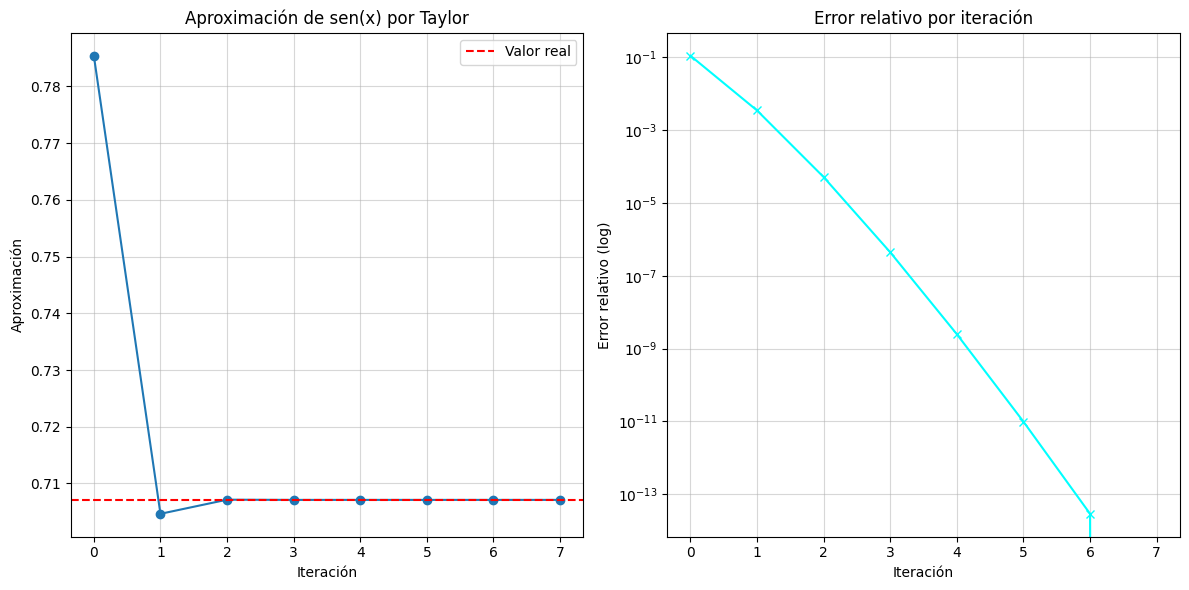

In [11]:
def taylor_sen(x, tol = 1e-12):

    real = np.sin(x) #usando np para obtener valor reaL
    n = 0
    term = x
    approx = 0
    series_vals = []
    errors = []

    while abs(term) > tol:
        term = (-1)**n * x**(2*n + 1) / factorial(2*n + 1)
        approx += term
        rel_error = abs((real - approx) / real)
        series_vals.append(approx)
        errors.append(rel_error)
        n += 1

    return approx, series_vals, errors, n

#Parámetros
x = np.pi / 4
real = np.sin(x)
approx, series_vals, errors, n_terms = taylor_sen(x, tol = 1e-12) #evaluamos con tolerancia e-12

print(f"Aproximación: {approx}")
print(f"Valor real:   {real}")
print(f"Términos usados: {n_terms}")
print(f"Error relativo: {abs((real - approx)/real):.50e}")
print(f"Error porcentual: {abs((real - approx)/real)*100:.50f}%")

plt.figure(figsize=(12, 6)) #procedemos a realizar los graficos

plt.subplot(1, 2, 1)
plt.plot(series_vals, marker = 'o')
plt.axhline(y = real, color = 'red', linestyle = '--', label = "Valor real")
plt.title("Aproximación de sen(x) por Taylor")
plt.xlabel("Iteración")
plt.ylabel("Aproximación")
plt.grid(True, alpha = 0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors, marker = 'x', color = 'cyan')
plt.yscale('log')
plt.title("Error relativo por iteración")
plt.xlabel("Iteración")
plt.ylabel("Error relativo (log)")
plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



=== Aproximación de √(1 + 0.5) ===
Valor real:       1.224744871391589
Aproximación:     1.2247451045404887
Error relativo:   1.90e-07
Error porcentual: 1.90e-05%
Iteraciones:      14



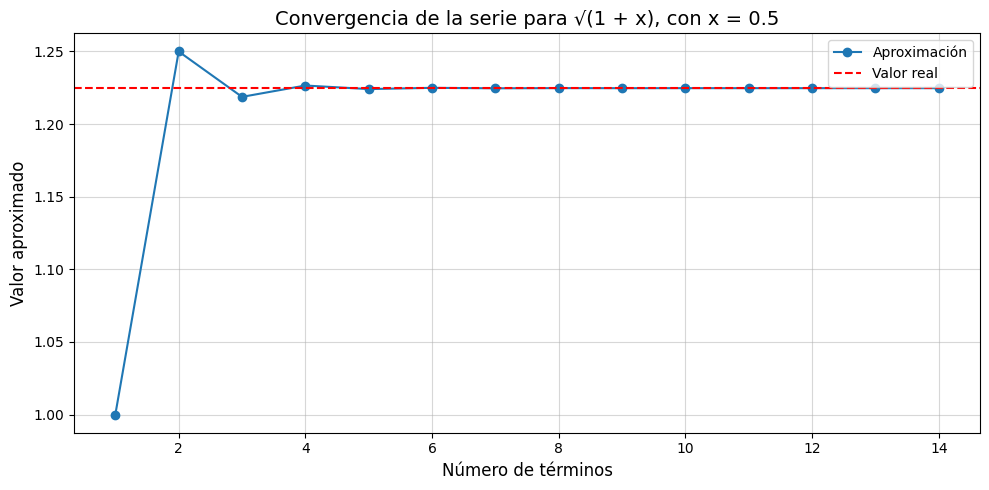

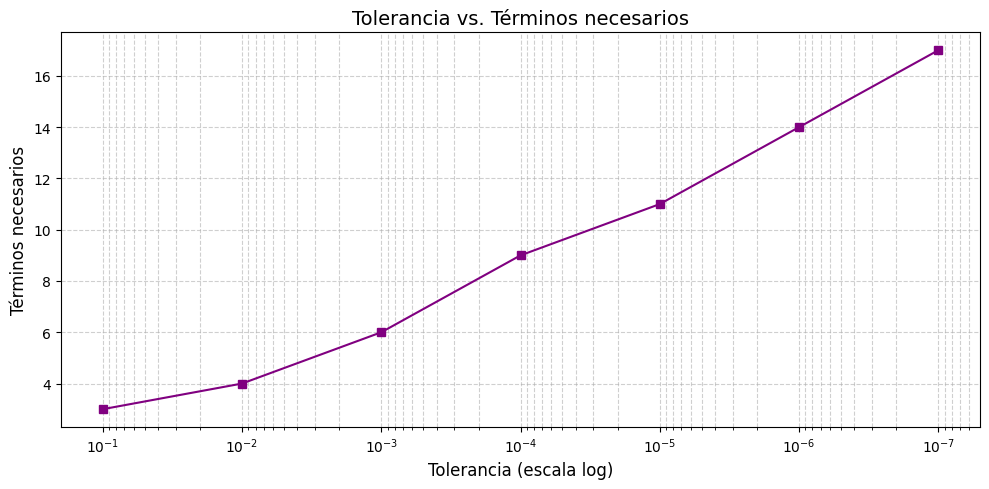

In [4]:
def binomial_generalizado(alpha, n): #funcion coeficiente binomial
    coef = 1
    for k in range(n):
        coef *= (alpha - k)
    return coef / factorial(n)

def taylor_sqrt_1px(x, alpha=0.5, tol=1e-6, max_terms=50): #funcion para serie (1 + x)^alpha, para alpha = 1/2
    approx = 0
    terms = []
    errors = []
    real_value = sqrt(1 + x)

    for n in range(max_terms):
        coef = binomial_generalizado(alpha, n)
        term = coef * x**n
        approx += term
        rel_error = abs((real_value - approx) / real_value)

        terms.append(approx)
        errors.append(rel_error)

        if abs(term) < tol:
            break

    return approx, terms, errors, n + 1


x = 0.5 #Parámetros
real_val = sqrt(1.5)
approx, series_vals, errors, iters = taylor_sqrt_1px(x) # Evaluamos la serie con tolerancia fija
#b:
print("=== Aproximación de √(1 + 0.5) ===")
print(f"Valor real:       {real_val}")
print(f"Aproximación:     {approx}")
print(f"Error relativo:   {errors[-1]:.2e}")
print(f"Error porcentual: {errors[-1] * 100:.2e}%")
print(f"Iteraciones:      {iters}\n") #a):la serie converge rapidamente y no requiere de muchas iteraciones

plt.figure(figsize=(10, 5))
plt.plot(range(1, iters + 1), series_vals, marker='o', label='Aproximación')
plt.axhline(y=real_val, color='r', linestyle='--', label='Valor real')
plt.title('Convergencia de la serie para √(1 + x), con x = 0.5', fontsize=14)
plt.xlabel('Número de términos', fontsize=12)
plt.ylabel('Valor aproximado', fontsize=12)
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.box(True)
plt.tight_layout()
plt.show()

print("\n" + "="*100 + "\n")

tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
iteraciones_necesarias = []

for tol in tolerancias:
    _, _, _, it = taylor_sqrt_1px(x, tol=tol)
    iteraciones_necesarias.append(it)

plt.figure(figsize=(10, 5))
plt.plot(tolerancias, iteraciones_necesarias, marker='s', linestyle='-', color='purple')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.title('Tolerancia vs. Términos necesarios', fontsize=14)
plt.xlabel('Tolerancia (escala log)', fontsize=12)
plt.ylabel('Términos necesarios', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.box(True)
plt.tight_layout()
plt.show()
### se requieren de entre 2 y 8 términos para alcanzar tolerancias de 1e-1 y 1e-7, lo cual es una aproximación eficiente teniendo en cuenta las iteraciones realizadas